In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df=pd.read_csv('social network.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop('User ID',axis=1,inplace=True)

In [5]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
le=LabelEncoder()

In [7]:
df['Gender']=le.fit_transform(df['Gender'])

In [8]:
sc=StandardScaler

In [9]:
plt.rcParams['figure.figsize']=(10,15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011D0524E320>,
      dtype=object)

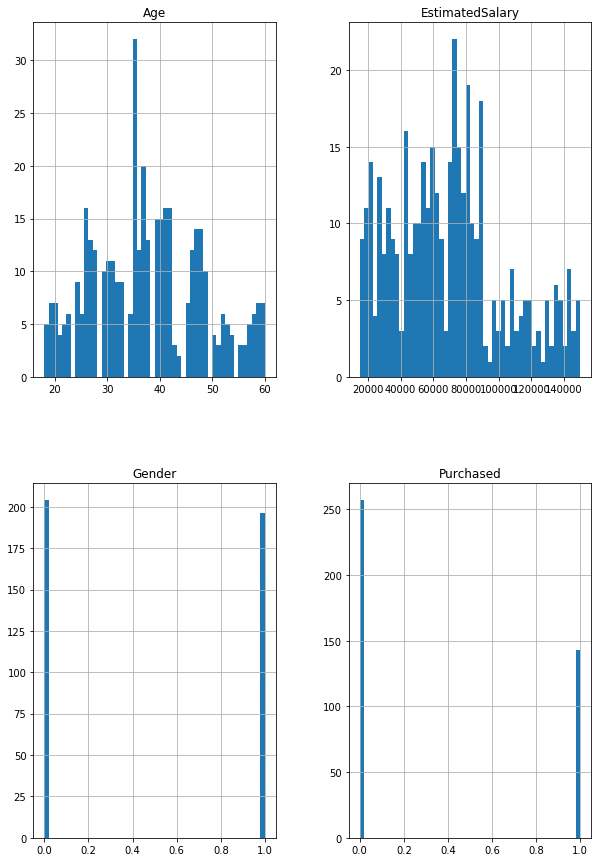

In [10]:
df.hist(bins=50)

In [11]:
from imblearn.combine import SMOTETomek

In [12]:
sm=SMOTETomek()

In [13]:
x=df.iloc[:,0:-1]

In [14]:
y=df.iloc[:,-1]

In [15]:
x.shape

(400, 3)

In [16]:
y.shape

(400,)

In [17]:
x,y=sm.fit_sample(x,y)

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [19]:
lr=LogisticRegression()

In [20]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
lr.score(xtrain,ytrain)

0.532394366197183

In [23]:
accuracy_score(lr.predict(xtest),ytest)

0.40336134453781514

In [24]:
dtc=DecisionTreeClassifier()

In [25]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
dtc.score(xtrain,ytrain)

0.9943661971830986

In [27]:
accuracy_score(dtc.predict(xtest),ytest)

0.9243697478991597

In [28]:
cvd=cross_val_score(dtc,x,y,cv=15,scoring='accuracy')

In [29]:
cvd.mean()

0.923888888888889

In [30]:
cvd.std()

0.05770929434953253

In [31]:
social_model=pickle.dumps(cvd)